<a href="https://colab.research.google.com/github/ber-pro/MIAT/blob/main/MIAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка данных


In [5]:
# !git clone https://github.com/ber-pro/MIAT.git

Cloning into 'MIAT'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 150.29 KiB | 1.15 MiB/s, done.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [6]:
df = pd.read_excel('/content/MIAT/EsseEthnetic - первичные данные.xlsx')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 47 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   №                                               820 non-null    int64  
 1   Этническая принадлежность                       820 non-null    int64  
 2   возраст                                         820 non-null    int64  
 3   возрастная группа                               820 non-null    int64  
 4   пол                                             820 non-null    int64  
 5   курение                                         820 non-null    int64  
 6   рост                                            820 non-null    float64
 7   вес                                             820 non-null    float64
 8   ИМТ                                             820 non-null    float64
 9   объем талии                                

## Постановка задачи


1. Прогнозирование попадания человека в группу риска сердечно-сосудистыми заболеваниями на основе амбулаторных анализов.
2. Определение возрастной группы на основе амбулаторных анализов.
3. Прогнозирования уровня глюкозы в крови.
4. Определение наличия или отсутствие гиперурикемии



##Прогнозирования уровня глюкозы в крови.

### Актуальность
> Диабет - одно из наиболее распространенных и серьезных хронических заболеваний в мире. Высокий уровень глюкозы в крови может привести к серьезным осложнениям, таким как сердечно-сосудистые заболевания, повреждение почек, слепота и другие. Прогнозирование уровня глюкозы имеет важное значение для эффективного управления диабетом и предотвращения осложнений.


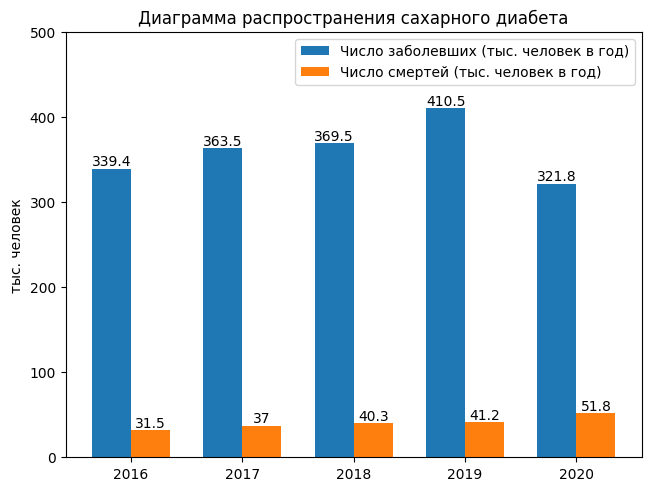

In [40]:
years = [f"{i}" for i in range(2016, 2021)]
penguin_means = {
    'Число заболевших (тыс. человек в год)': [339.4, 363.5, 369.5, 410.5, 321.8] ,
    'Число смертей (тыс. человек в год)': [31.5, 37.0, 40.3, 41.2, 51.8],
}

x = np.arange(len(years))  # the label locations
width = 0.35 # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects)

    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('тыс. человек')
ax.set_title('Диаграмма распространения сахарного диабета')
ax.set_xticks(x + width, years)
ax.legend()
ax.set_ylim(0, 500)

plt.show()

> Количество больных диабетом в России на сегодняшний день составляет около 10,5 млн человек, по данным Минздрава. То есть от этого заболевания страдает каждый 15-й россиян. По официальной статистике, в 2021 году число диабетиков в РФ составляло 5,2 млн.

> Предсказание уровня глюкозы может помочь диабетикам более точно контролировать свой уровень сахара и, следовательно, уменьшить риск возникновения осложнений. Это может повысить качество и продолжительность жизни пациентов.


Прогнозирования уровня глюкозы в крови относится к задачам **регрессионного** анализа

##**!!!! TODO: Анализ признаков**